# Employee Commuting Principal Component Analysis (PCA) and Hierarchical Clustering

In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
from sklearn.metrics import (r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error)
from sklearn.preprocessing import PowerTransformer
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans, AgglomerativeClustering
from IPython.display import display

# Import employee_commuting dataframe
employee_commuting=pd.read_csv('employee_commuting.csv')

In [2]:
employee_commuting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4661 entries, 0 to 4660
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   account_name                4661 non-null   object 
 1   account_id                  4661 non-null   int64  
 2   Year                        4661 non-null   int64  
 3   incorporated_country        4661 non-null   object 
 4   Primary activity            4661 non-null   object 
 5   Primary sector              4661 non-null   object 
 6   Market_Cap_USD              3874 non-null   float64
 7   Third_party_verification    4659 non-null   object 
 8   Revenue_USD                 3887 non-null   float64
 9   ebitda_USD                  3887 non-null   float64
 10  grossProfit_USD             3887 non-null   float64
 11  netIncome_USD               3887 non-null   float64
 12  cashAndCashEquivalents_USD  3887 non-null   float64
 13  shortTermInvestments_USD    3887 

In [3]:
employee_commuting.head()

,account_name,account_id,Year,incorporated_country,Primary activity,Primary sector,Market_Cap_USD,Third_party_verification,Revenue_USD,ebitda_USD,...,longTermInvestments_USD,totalAssets_USD,totalLiabilities_USD,totalInvestments_USD,totalDebt_USD,totalEquity_USD,Scope_3_emissions_type,Scope_3_emissions_amount,scope_1_2_emissions_amount,Year_sq
0,3i Group,44,2018,United Kingdom,Asset managers,Financial services,9.548124e+09,Third-party verification or assurance process ...,1.728470e+09,1.565910e+09,...,8.544560e+09,1.107567e+10,1.031240e+09,8.544560e+09,7.302500e+08,1.004443e+10,Employee commuting,3.90,3.389500e+02,4072324
1,Antofagasta,820,2018,United Kingdom,Other non-ferrous ore mining,Metallic mineral mining,7.721230e+09,Third-party verification or assurance process ...,4.733100e+09,2.092800e+09,...,1.060800e+09,1.410250e+10,4.664400e+09,1.924000e+09,2.493900e+09,9.438100e+09,Employee commuting,6213.00,3.292186e+06,4072324
2,Aptiv,4407,2018,United Kingdom,Electrical equipment,Electrical & electronic equipment,1.595156e+10,No third-party verification or assurance,1.443500e+10,2.260000e+09,...,9.900000e+07,1.248000e+10,8.810000e+09,1.710000e+08,4.344000e+09,3.670000e+09,Employee commuting,237000.00,3.804718e+05,4072324
3,Arm Ltd.,950,2018,United Kingdom,Electronic components,Electrical & electronic equipment,NaN,No third-party verification or assurance,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Employee commuting,4190.96,7.728538e+03,4072324
4,Associated British Foods,1085,2018,United Kingdom,Apparel stores,Discretionary retail,2.051429e+10,Third-party verification or assurance process ...,1.977898e+10,2.363470e+09,...,3.429000e+08,1.738884e+10,5.582920e+09,3.810000e+08,9.880600e+08,1.180592e+10,Employee commuting,57722.00,2.801746e+06,4072324


In [4]:
# Rename features
employee_commuting = employee_commuting.rename(columns={'incorporated_country': 'Countries',
                                          'Primary activity': 'Primary_activity',
                                          'Primary sector': 'Primary_sector'})

# Drop unneeded columns
employee_commuting = employee_commuting.drop(
    ['Third_party_verification', 'Scope_3_emissions_type'], axis=1, errors='ignore')

employee_commuting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4661 entries, 0 to 4660
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   account_name                4661 non-null   object 
 1   account_id                  4661 non-null   int64  
 2   Year                        4661 non-null   int64  
 3   Countries                   4661 non-null   object 
 4   Primary_activity            4661 non-null   object 
 5   Primary_sector              4661 non-null   object 
 6   Market_Cap_USD              3874 non-null   float64
 7   Revenue_USD                 3887 non-null   float64
 8   ebitda_USD                  3887 non-null   float64
 9   grossProfit_USD             3887 non-null   float64
 10  netIncome_USD               3887 non-null   float64
 11  cashAndCashEquivalents_USD  3887 non-null   float64
 12  shortTermInvestments_USD    3887 non-null   float64
 13  longTermInvestments_USD     3887 

In [5]:
# Looking at missing data
print(employee_commuting.isnull().mean().sort_values(ascending=False).round(3) * 100)

Market_Cap_USD                16.9
cashAndCashEquivalents_USD    16.6
totalLiabilities_USD          16.6
totalEquity_USD               16.6
totalDebt_USD                 16.6
Revenue_USD                   16.6
ebitda_USD                    16.6
grossProfit_USD               16.6
netIncome_USD                 16.6
totalInvestments_USD          16.6
shortTermInvestments_USD      16.6
longTermInvestments_USD       16.6
totalAssets_USD               16.6
scope_1_2_emissions_amount     0.2
Scope_3_emissions_amount       0.0
account_name                   0.0
account_id                     0.0
Primary_sector                 0.0
Primary_activity               0.0
Countries                      0.0
Year                           0.0
Year_sq                        0.0
dtype: float64


### Principal Component Analysis (PCA) — Employee Commuting Dataset

- Selects relevant numeric features, excluding identifiers and categorical columns.
- Applies a signed log transformation to reduce skewness and handle zeros/negatives.
- Drops rows with missing values for PCA input.
- Standardizes features before fitting PCA.
- Computes principal components and appends scores back to the original dataset for valid rows.
- Visualizes explained variance by component (scree plot and cumulative plot).
- Prints cumulative variance explained by each principal component for interpretation.

_Result:_  
The `employee_commuting_with_pcs` DataFrame contains all original columns plus principal component scores for rows with complete, transformed input data, enabling robust downstream analysis.

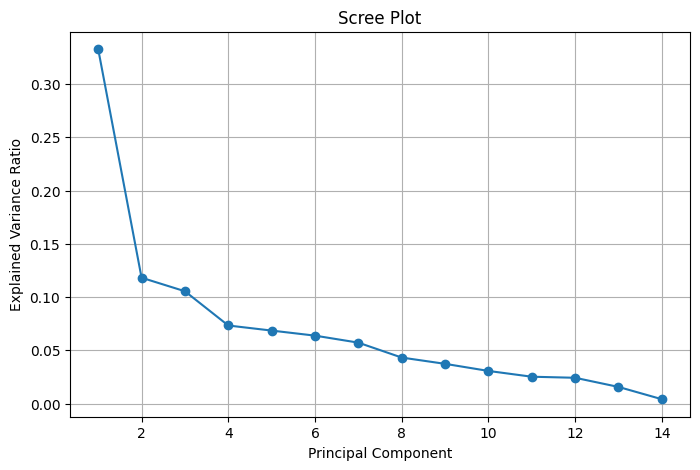

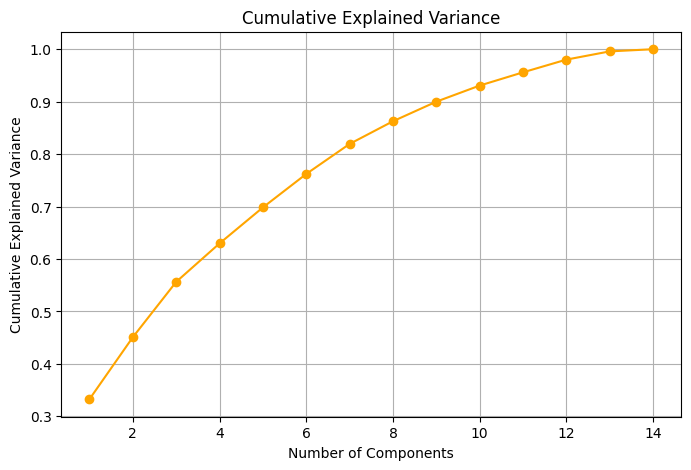

Cumulative variance explained by each additional principal component:
  PC1: 0.3327
  PC2: 0.4509
  PC3: 0.5564
  PC4: 0.6298
  PC5: 0.6983
  PC6: 0.7622
  PC7: 0.8194
  PC8: 0.8627
  PC9: 0.9000
  PC10: 0.9307
  PC11: 0.9559
  PC12: 0.9802
  PC13: 0.9959
  PC14: 1.0000


In [6]:
# --- STEP 1: Select appropriate columns for PCA ---
exclude_cols = [
    "account_id", "Year", "Year_sq",
    "account_name", "Countries", "Primary_activity", "Primary_sector"
]
numeric_cols = [
    col for col in employee_commuting.columns
    if col not in exclude_cols and pd.api.types.is_numeric_dtype(employee_commuting[col])
    and col != "Scope_3_emissions_amount"
]
X = employee_commuting[numeric_cols].copy()

# --- STEP 2: Apply sign-log transformation ---
def sign_log_transform(x):
    return np.sign(x) * np.log1p(np.abs(x))
X_transformed = X.apply(sign_log_transform)

# --- STEP 3: Drop rows with missing values (keep track of indices) ---
X_dropped = X_transformed.dropna()
pca_indices = X_dropped.index

# --- STEP 4: Standardize the data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dropped)

# --- STEP 5: Fit PCA ---
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# --- STEP 6: Create a DataFrame for PCs, index matches original ---
num_pcs = X_pca.shape[1]
pc_columns = [f"PC{i+1}" for i in range(num_pcs)]
pcs_df = pd.DataFrame(X_pca, columns=pc_columns, index=pca_indices)

# --- STEP 7: Append PCs back to the original DataFrame (only for valid rows) ---
employee_commuting_with_pcs = employee_commuting.copy()
for col in pc_columns:
    employee_commuting_with_pcs[col] = np.nan  # initialize with NaN

employee_commuting_with_pcs.loc[pcs_df.index, pc_columns] = pcs_df

# --- Plots ---
explained_var_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var_ratio) + 1), explained_var_ratio, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(
    range(1, len(explained_var_ratio) + 1),
    np.cumsum(explained_var_ratio),
    marker='o',
    color='orange'
)
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# --- Print cumulative variance explained for each PC ---
cumulative_var = np.cumsum(explained_var_ratio)
print("Cumulative variance explained by each additional principal component:")
for i, var in enumerate(cumulative_var, start=1):
    print(f"  PC{i}: {var:.4f}")

# --- END ---
# employee_commuting_with_pcs now contains the principal components for valid rows.

Nine pc's explains 90% of the variance in the data while 4 pc's is at the bottom of the "elbow" with much less significant return for each increase in number of pc's.<br>
I'll investigate both 9 pc's and 4 pc's performance on HLM models.

### Principal Component Analysis (PCA) — Employee Commuting Dataset

- Selects numeric features, excluding identifiers and categorical columns.
- Applies signed log transformation for normalization.
- Drops rows with missing values before PCA.
- Standardizes features and fits PCA for 9 and 4 components.
- Appends principal component scores to the main dataset.
- Adds sign-log transformed target variable to the dataset.
- Splits the data into train (2018–2022) and test (2023) sets by year, keeping only companies present in training.

_Result:_  
`employee_commuting_pca` contains all PC features and transformed targets, with train/test sets ready for modeling.

In [7]:
# --- Prepare Data ---
exclude_cols = [
    "account_id", "Year", "Year_sq",
    "account_name", "Countries", "Primary_activity", "Primary_sector"
]
numeric_cols = [
    col for col in employee_commuting.columns
    if col not in exclude_cols and pd.api.types.is_numeric_dtype(employee_commuting[col])
    and col != "Scope_3_emissions_amount"
]
X = employee_commuting[numeric_cols].copy()

def sign_log_transform(x):
    return np.sign(x) * np.log1p(np.abs(x))
X_transformed = X.apply(sign_log_transform)
pca_data = X_transformed.dropna().copy()
pca_data["account_id"] = employee_commuting.loc[pca_data.index, "account_id"]
pca_data["Year"] = employee_commuting.loc[pca_data.index, "Year"]

X_pca_input = pca_data.drop(columns=["account_id", "Year"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca_input)

# --- PCA for 9 components ---
pca9 = PCA(n_components=9)
pcs9 = pca9.fit_transform(X_scaled)
pcs9_df = pd.DataFrame(pcs9, columns=[f"PC9_{i+1}" for i in range(9)], index=pca_data.index)

# --- PCA for 4 components ---
pca4 = PCA(n_components=4)
pcs4 = pca4.fit_transform(X_scaled)
pcs4_df = pd.DataFrame(pcs4, columns=[f"PC4_{i+1}" for i in range(4)], index=pca_data.index)

# --- Merge all PC features to original DataFrame ---
employee_commuting_pca = employee_commuting.copy()
employee_commuting_pca = employee_commuting_pca.join(pcs9_df)
employee_commuting_pca = employee_commuting_pca.join(pcs4_df)

# --- Add transformed target and optionally other features ---
employee_commuting_pca['slog_Scope_3_emissions_amount'] = sign_log_transform(employee_commuting_pca['Scope_3_emissions_amount'])

# Optional: Rename columns for consistency
employee_commuting_pca = employee_commuting_pca.rename(columns={'incorporated_country': 'Countries',
                                                               'Primary activity': 'Primary_activity',
                                                               'Primary sector': 'Primary_sector'})

# --- Train/test split by year ---
train_df = employee_commuting_pca[employee_commuting_pca['Year'].between(2018, 2022)].copy()
test_df  = employee_commuting_pca[employee_commuting_pca['Year'] == 2023].copy()

# Keep only companies present in training
valid_companies = set(train_df['account_id'].unique())
test_df = test_df[test_df['account_id'].isin(valid_companies)].copy()

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3760 entries, 0 to 3759
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_name                   3760 non-null   object 
 1   account_id                     3760 non-null   int64  
 2   Year                           3760 non-null   int64  
 3   Countries                      3760 non-null   object 
 4   Primary_activity               3760 non-null   object 
 5   Primary_sector                 3760 non-null   object 
 6   Market_Cap_USD                 3098 non-null   float64
 7   Revenue_USD                    3140 non-null   float64
 8   ebitda_USD                     3140 non-null   float64
 9   grossProfit_USD                3140 non-null   float64
 10  netIncome_USD                  3140 non-null   float64
 11  cashAndCashEquivalents_USD     3140 non-null   float64
 12  shortTermInvestments_USD       3140 non-null   float6

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851 entries, 3760 to 4660
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_name                   851 non-null    object 
 1   account_id                     851 non-null    int64  
 2   Year                           851 non-null    int64  
 3   Countries                      851 non-null    object 
 4   Primary_activity               851 non-null    object 
 5   Primary_sector                 851 non-null    object 
 6   Market_Cap_USD                 729 non-null    float64
 7   Revenue_USD                    702 non-null    float64
 8   ebitda_USD                     702 non-null    float64
 9   grossProfit_USD                702 non-null    float64
 10  netIncome_USD                  702 non-null    float64
 11  cashAndCashEquivalents_USD     702 non-null    float64
 12  shortTermInvestments_USD       702 non-null    floa

### HLM Modeling — Employee Commuting (PC9)

- Uses PCA-derived train and test splits.
- Filters for required features and target variable.
- Ensures categorical levels in test are present in train.
- Fits mixed-effects model on training set.
- Evaluates predictions and metrics on test set.
- Visualizes distributions and returns summary metrics.

_Result:_  
Train and test sets are derived from PCA-valid rows, supporting robust HLM model fitting and fair out-of-sample evaluation.

                                         Mixed Linear Model Regression Results
Model:                            MixedLM               Dependent Variable:               slog_Scope_3_emissions_amount
No. Observations:                 3092                  Method:                           ML                           
No. Groups:                       741                   Scale:                            0.5033                       
Min. group size:                  1                     Log-Likelihood:                   -4185.9872                   
Max. group size:                  5                     Converged:                        Yes                          
Mean group size:                  4.2                                                                                  
-----------------------------------------------------------------------------------------------------------------------
                                                                           Coef. 

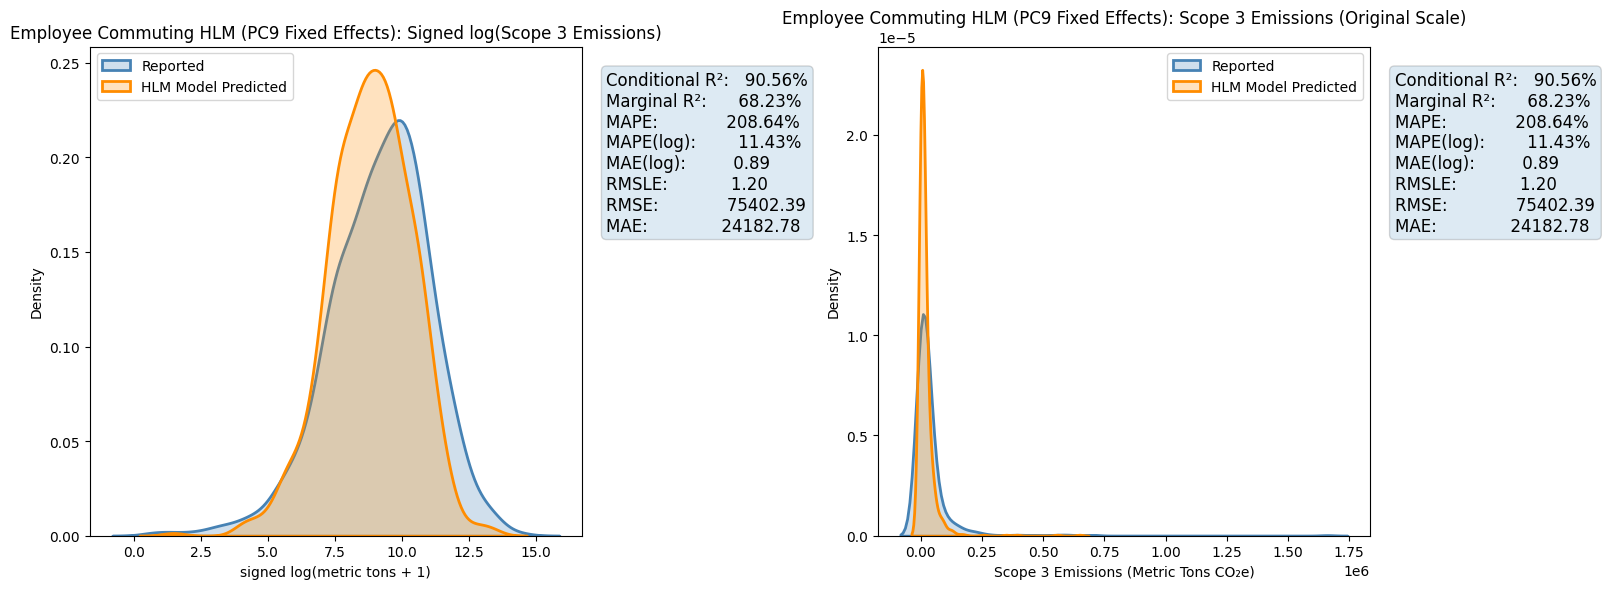

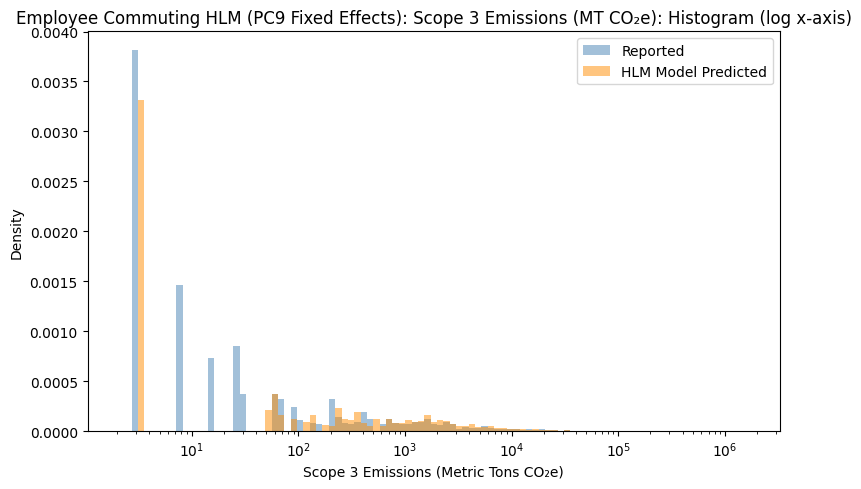

In [11]:
# --- Assumes you have already run PCA and have employee_commuting_pca with PC9 features ---

# --- 1. Define train and test splits from employee_commuting_pca ---
# Split for modeling using ONLY rows used in PCA (i.e., those with PC features)
valid_idx = employee_commuting_pca.dropna(subset=[f'PC9_{i}' for i in range(1, 10)]).index
employee_commuting_pca_valid = employee_commuting_pca.loc[valid_idx].copy()

# Split by year
train_df_PC9 = employee_commuting_pca_valid[
    (employee_commuting_pca_valid['Year'] >= 2018) & (employee_commuting_pca_valid['Year'] <= 2022)
].copy()
test_df_PC9 = employee_commuting_pca_valid[
    employee_commuting_pca_valid['Year'] == 2023
].copy()

# Only keep companies in train set for test set
valid_accounts = set(train_df_PC9['account_id'].unique())
test_df_PC9 = test_df_PC9[test_df_PC9['account_id'].isin(valid_accounts)].copy()

# --- 2. Filter for required columns only ---
feature_cols_PC9 = [f'PC9_{i}' for i in range(1, 10)]  # PC9_1 to PC9_9
target_col_PC9 = 'slog_Scope_3_emissions_amount'
cat_cols_PC9 = ['Countries', 'Year', 'account_id', 'Primary_activity']

all_model_vars_PC9 = feature_cols_PC9 + [target_col_PC9] + cat_cols_PC9
train_df_PC9 = train_df_PC9.dropna(subset=all_model_vars_PC9).copy()
test_df_PC9 = test_df_PC9.dropna(subset=all_model_vars_PC9).copy()

# --- 3. Ensure all categorical levels in test are present in train ---
for cat_col in ['Countries', 'Primary_activity']:
    train_cats = set(train_df_PC9[cat_col].unique())
    n_before = len(test_df_PC9)
    test_df_PC9 = test_df_PC9[test_df_PC9[cat_col].isin(train_cats)]
    n_after = len(test_df_PC9)
    if n_after < n_before:
        print(f"Warning: Dropped {n_before - n_after} test rows with unseen {cat_col} categories.")

if test_df_PC9.empty:
    print("WARNING: The filtered test set is empty. No predictions or metrics can be computed.")
else:
    # --- 4. Model formula ---
    fixed_effects = (
        ' + '.join(feature_cols_PC9) +
        ' + C(Countries) + C(Primary_activity) + Year'
    )
    formula = f'{target_col_PC9} ~ {fixed_effects}'

    # --- 5. Fit the mixed-effects model ---
    import warnings
    import statsmodels.formula.api as smf
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        md = smf.mixedlm(formula, data=train_df_PC9, groups=train_df_PC9['account_id'])
        mdf_PC9 = md.fit(reml=False)
    print(mdf_PC9.summary())

    # --- 6. CALCULATE CONDITIONAL AND MARGINAL R² ---
    import numpy as np
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error

    var_fixed = np.var(mdf_PC9.fittedvalues)
    var_resid = mdf_PC9.scale
    var_random = mdf_PC9.cov_re.iloc[0, 0] if mdf_PC9.cov_re.shape[0] > 0 else 0.0
    var_random_total = var_random

    r2_marginal = var_fixed / (var_fixed + var_random_total + var_resid)
    r2_conditional = (var_fixed + var_random_total) / (var_fixed + var_random_total + var_resid)

    print(f"Marginal R² (fixed only):      {r2_marginal:.4f}")
    print(f"Conditional R² (fixed+random): {r2_conditional:.4f}")

    # --- 7. Predict on test set ---
    test_df_PC9['predicted_log'] = mdf_PC9.predict(test_df_PC9)
    test_df_PC9['predicted'] = np.sign(test_df_PC9['predicted_log']) * (np.expm1(np.abs(test_df_PC9['predicted_log'])))

    # --- 8. Metrics ---
    y_true_log = test_df_PC9[target_col_PC9]
    y_pred_log = test_df_PC9['predicted_log']
    y_true = np.sign(y_true_log) * (np.expm1(np.abs(y_true_log)))
    y_pred = test_df_PC9['predicted']

    mask = (
        np.isfinite(y_true_log) & np.isfinite(y_pred_log) &
        np.isfinite(y_true) & np.isfinite(y_pred)
    )
    y_true_log = y_true_log[mask]
    y_pred_log = y_pred_log[mask]
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    r2_log_pct = r2_score(y_true_log, y_pred_log) * 100
    r2_pct = r2_score(y_true, y_pred) * 100
    mape_log = np.mean(np.abs((y_true_log - y_pred_log) / np.clip(y_true_log, 1e-8, None))) * 100
    mape_orig = np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-8, None))) * 100
    rmsle = np.sqrt(mean_squared_log_error(np.abs(y_true) + 1, np.abs(y_pred) + 1))
    rmse_orig = np.sqrt(mean_squared_error(y_true, y_pred))
    mae_orig = mean_absolute_error(y_true, y_pred)
    mae_log = mean_absolute_error(y_true_log, y_pred_log)

    metrics_text = (
        f"Conditional R²:   {r2_conditional*100:.2f}%\n"
        f"Marginal R²:      {r2_marginal*100:.2f}%\n"
        f"MAPE:             {mape_orig:.2f}%\n"
        f"MAPE(log):        {mape_log:.2f}%\n"
        f"MAE(log):         {mae_log:.2f}\n"
        f"RMSLE:            {rmsle:.2f}\n"
        f"RMSE:             {rmse_orig:.2f}\n"
        f"MAE:              {mae_orig:.2f}"
    )

    print("\nEmployee Commuting HLM with PC9 Fixed Effects: Test Set Performance Metrics:")
    print(metrics_text)

    # --- 9. Feature coefficients ---
    import pandas as pd
    coef_df = pd.DataFrame({
        'coef': mdf_PC9.params,
        'pvalue': mdf_PC9.pvalues
    }).drop(index="Intercept", errors='ignore').sort_values(by="pvalue")
    print("\nTop Influential Features (by p-value):")
    print(coef_df.head(10))
    print("\nAll feature coefficients sorted by absolute value:")
    print(coef_df.reindex(coef_df['coef'].abs().sort_values(ascending=False).index))

    # --- 10. Visualization ---
    import matplotlib.pyplot as plt
    import seaborn as sns
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    if y_pred_log.nunique() > 1:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        sns.kdeplot(y_pred_log, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[0], color='darkorange')
    else:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        axes[0].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[0].set_title("Employee Commuting HLM (PC9 Fixed Effects): Signed log(Scope 3 Emissions)")
    axes[0].set_xlabel("signed log(metric tons + 1)")
    axes[0].set_ylabel("Density")
    axes[0].legend()
    axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    if y_pred.nunique() > 1:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        sns.kdeplot(y_pred, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[1], color='darkorange')
    else:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        axes[1].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[1].set_title("Employee Commuting HLM (PC9 Fixed Effects): Scope 3 Emissions (Original Scale)")
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    axes[1].set_ylabel("Density")
    axes[1].legend()
    axes[1].text(1.05, 0.95, metrics_text, transform=axes[1].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    plt.tight_layout()
    plt.show()
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)
    plt.figure(figsize=(8, 5))
    sns.histplot(y_true, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported")
    sns.histplot(y_pred, bins=log_bins, stat="density", color="darkorange", alpha=0.5, label="HLM Model Predicted")
    plt.xscale("log")
    plt.title("Employee Commuting HLM (PC9 Fixed Effects): Scope 3 Emissions (MT CO₂e): Histogram (log x-axis)")
    plt.xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- 11. RETURN METRICS FOR SUMMARY TABLE ---
    PC9_model_metrics = {
        "Model": "HLM PC9",
        "Conditional_R2": r2_conditional,
        "Marginal_R2": r2_marginal,
        "RMSE": rmse_orig,
        "MAE": mae_orig,
        "MAE_log": mae_log,
        "RMSLE": rmsle,
        "MAPE": mape_orig,
        "# Obs (train)": len(train_df_PC9),
        "# Obs (test)": len(test_df_PC9),
        "# Obs (train/test)": f"{len(train_df_PC9)}/{len(test_df_PC9)}"
    }

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3760 entries, 0 to 3759
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_name                   3760 non-null   object 
 1   account_id                     3760 non-null   int64  
 2   Year                           3760 non-null   int64  
 3   Countries                      3760 non-null   object 
 4   Primary_activity               3760 non-null   object 
 5   Primary_sector                 3760 non-null   object 
 6   Market_Cap_USD                 3098 non-null   float64
 7   Revenue_USD                    3140 non-null   float64
 8   ebitda_USD                     3140 non-null   float64
 9   grossProfit_USD                3140 non-null   float64
 10  netIncome_USD                  3140 non-null   float64
 11  cashAndCashEquivalents_USD     3140 non-null   float64
 12  shortTermInvestments_USD       3140 non-null   float6

### HLM Modeling — Employee Commuting (PC4)

- Uses pre-defined PCA-based train and test sets.
- Filters for required features and target.
- Ensures test set only contains categorical levels present in train.
- Fits mixed-effects model to training set.
- Evaluates predictions and metrics on the test set.
- Visualizes distributions and returns summary metrics.

_Result:_  
Train and test sets are derived from PCA-valid rows (PC4 features), supporting robust HLM model fitting and fair out-of-sample evaluation.

                                         Mixed Linear Model Regression Results
Model:                            MixedLM               Dependent Variable:               slog_Scope_3_emissions_amount
No. Observations:                 3092                  Method:                           ML                           
No. Groups:                       741                   Scale:                            0.5089                       
Min. group size:                  1                     Log-Likelihood:                   -4221.4924                   
Max. group size:                  5                     Converged:                        Yes                          
Mean group size:                  4.2                                                                                  
-----------------------------------------------------------------------------------------------------------------------
                                                                           Coef. 

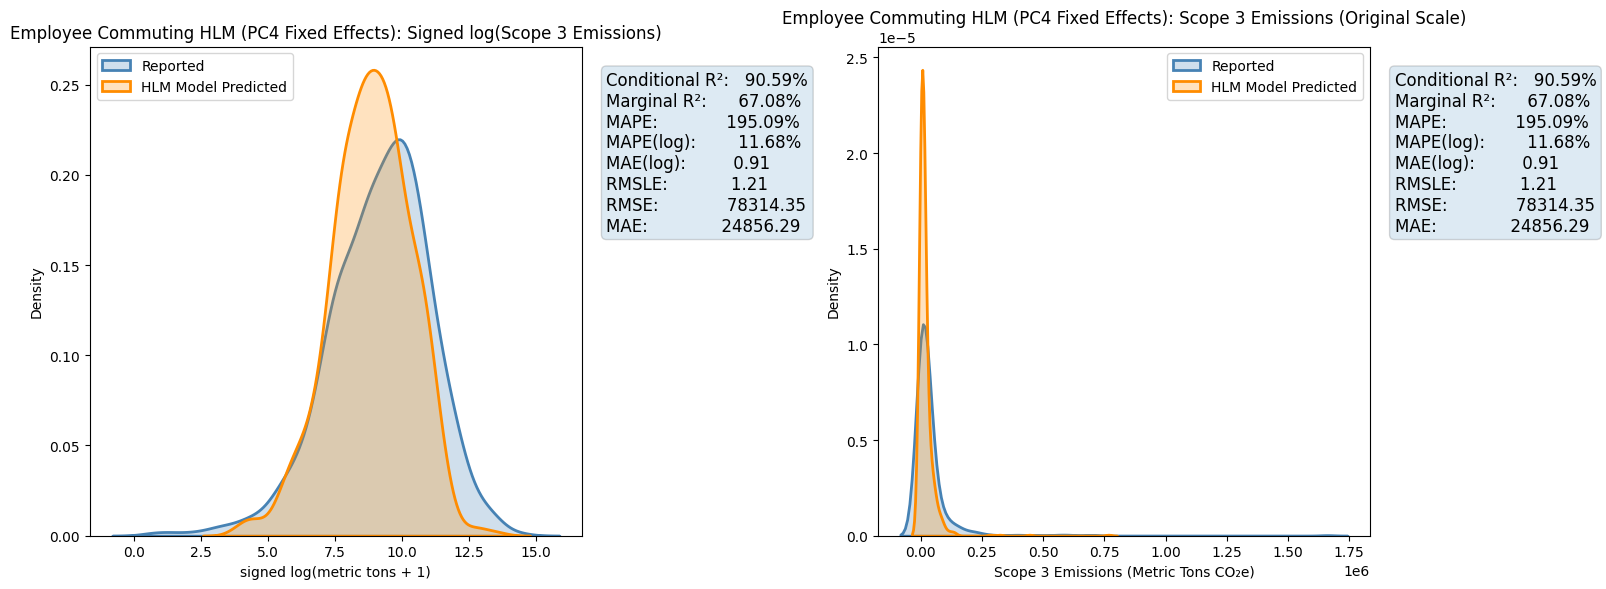

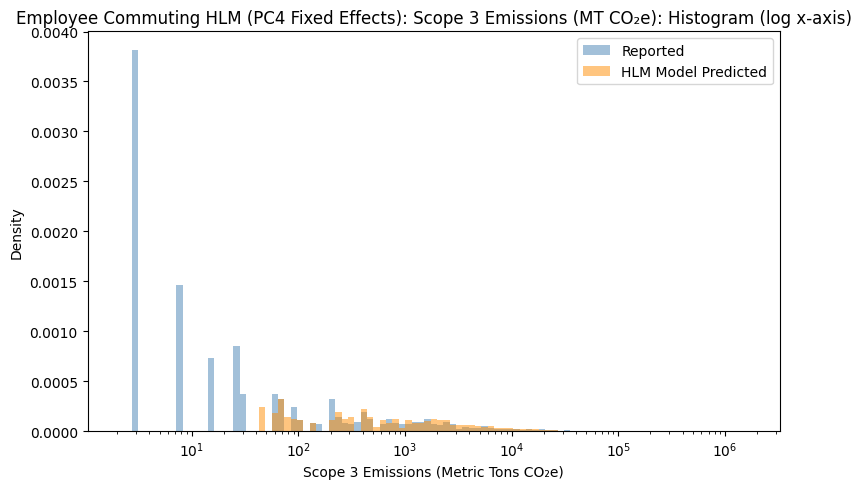

In [14]:
# --- Assumes you have already run PCA and have employee_commuting_pca with PC4 features ---

# --- 1. Define train and test splits from employee_commuting_pca ---
# Split for modeling using ONLY rows used in PCA (i.e., those with PC features)
valid_idx = employee_commuting_pca.dropna(subset=[f'PC4_{i}' for i in range(1, 5)]).index
employee_commuting_pca_valid = employee_commuting_pca.loc[valid_idx].copy()

# Split by year
train_df_pc4 = employee_commuting_pca_valid[
    (employee_commuting_pca_valid['Year'] >= 2018) & (employee_commuting_pca_valid['Year'] <= 2022)
].copy()
test_df_pc4 = employee_commuting_pca_valid[
    employee_commuting_pca_valid['Year'] == 2023
].copy()

# Only keep companies in train set for test set
valid_accounts = set(train_df_pc4['account_id'].unique())
test_df_pc4 = test_df_pc4[test_df_pc4['account_id'].isin(valid_accounts)].copy()

# --- 2. Filter for required columns only ---
feature_cols_pc4 = [f'PC4_{i}' for i in range(1, 5)]
target_col_pc4 = 'slog_Scope_3_emissions_amount'
cat_cols_pc4 = ['Countries', 'Year', 'account_id', 'Primary_activity']

all_model_vars_pc4 = feature_cols_pc4 + [target_col_pc4] + cat_cols_pc4
train_df_pc4 = train_df_pc4.dropna(subset=all_model_vars_pc4).copy()
test_df_pc4 = test_df_pc4.dropna(subset=all_model_vars_pc4).copy()

# --- 3. Ensure all categorical levels in test are present in train ---
for cat_col in ['Countries', 'Primary_activity']:
    train_cats = set(train_df_pc4[cat_col].unique())
    n_before = len(test_df_pc4)
    test_df_pc4 = test_df_pc4[test_df_pc4[cat_col].isin(train_cats)]
    n_after = len(test_df_pc4)
    if n_after < n_before:
        print(f"Warning: Dropped {n_before - n_after} test rows with unseen {cat_col} categories.")

if test_df_pc4.empty:
    print("WARNING: The filtered test set is empty. No predictions or metrics can be computed.")
else:
    # --- 4. Model formula ---
    fixed_effects = (
        ' + '.join(feature_cols_pc4) +
        ' + C(Countries) + C(Primary_activity) + Year'
    )
    formula = f'{target_col_pc4} ~ {fixed_effects}'

    # --- 5. Fit the mixed-effects model ---
    import statsmodels.formula.api as smf
    import warnings
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        md = smf.mixedlm(formula, data=train_df_pc4, groups=train_df_pc4['account_id'])
        mdf_pc4 = md.fit(reml=False)
    print(mdf_pc4.summary())

    # --- 6. CALCULATE CONDITIONAL AND MARGINAL R² ---
    import numpy as np
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error

    var_fixed = np.var(mdf_pc4.fittedvalues)
    var_resid = mdf_pc4.scale
    var_random = mdf_pc4.cov_re.iloc[0, 0] if mdf_pc4.cov_re.shape[0] > 0 else 0.0
    var_random_total = var_random

    r2_marginal = var_fixed / (var_fixed + var_random_total + var_resid)
    r2_conditional = (var_fixed + var_random_total) / (var_fixed + var_random_total + var_resid)

    print(f"Marginal R² (fixed only):      {r2_marginal:.4f}")
    print(f"Conditional R² (fixed+random): {r2_conditional:.4f}")

    # --- 7. Predict on test set ---
    test_df_pc4['predicted_log'] = mdf_pc4.predict(test_df_pc4)
    test_df_pc4['predicted'] = np.sign(test_df_pc4['predicted_log']) * (np.expm1(np.abs(test_df_pc4['predicted_log'])))

    # --- 8. Metrics ---
    y_true_log = test_df_pc4[target_col_pc4]
    y_pred_log = test_df_pc4['predicted_log']
    y_true = np.sign(y_true_log) * (np.expm1(np.abs(y_true_log)))
    y_pred = test_df_pc4['predicted']

    mask = (
        np.isfinite(y_true_log) & np.isfinite(y_pred_log) &
        np.isfinite(y_true) & np.isfinite(y_pred)
    )
    y_true_log = y_true_log[mask]
    y_pred_log = y_pred_log[mask]
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    r2_log_pct = r2_score(y_true_log, y_pred_log) * 100
    r2_pct = r2_score(y_true, y_pred) * 100
    mape_log = np.mean(np.abs((y_true_log - y_pred_log) / np.clip(y_true_log, 1e-8, None))) * 100
    mape_orig = np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-8, None))) * 100
    rmsle = np.sqrt(mean_squared_log_error(np.abs(y_true) + 1, np.abs(y_pred) + 1))
    rmse_orig = np.sqrt(mean_squared_error(y_true, y_pred))
    mae_orig = mean_absolute_error(y_true, y_pred)
    mae_log = mean_absolute_error(y_true_log, y_pred_log)

    metrics_text = (
        f"Conditional R²:   {r2_conditional*100:.2f}%\n"
        f"Marginal R²:      {r2_marginal*100:.2f}%\n"
        f"MAPE:             {mape_orig:.2f}%\n"
        f"MAPE(log):        {mape_log:.2f}%\n"
        f"MAE(log):         {mae_log:.2f}\n"
        f"RMSLE:            {rmsle:.2f}\n"
        f"RMSE:             {rmse_orig:.2f}\n"
        f"MAE:              {mae_orig:.2f}"
    )

    print("\nEmployee Commuting HLM with PC4 Fixed Effects: Test Set Performance Metrics:")
    print(metrics_text)

    # --- 9. Feature coefficients ---
    import pandas as pd
    coef_df = pd.DataFrame({
        'coef': mdf_pc4.params,
        'pvalue': mdf_pc4.pvalues
    }).drop(index="Intercept", errors='ignore').sort_values(by="pvalue")
    print("\nTop Influential Features (by p-value):")
    print(coef_df.head(10))
    print("\nAll feature coefficients sorted by absolute value:")
    print(coef_df.reindex(coef_df['coef'].abs().sort_values(ascending=False).index))

    # --- 10. Visualization ---
    import matplotlib.pyplot as plt
    import seaborn as sns
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    if y_pred_log.nunique() > 1:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        sns.kdeplot(y_pred_log, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[0], color='darkorange')
    else:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        axes[0].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[0].set_title("Employee Commuting HLM (PC4 Fixed Effects): Signed log(Scope 3 Emissions)")
    axes[0].set_xlabel("signed log(metric tons + 1)")
    axes[0].set_ylabel("Density")
    axes[0].legend()
    axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    if y_pred.nunique() > 1:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        sns.kdeplot(y_pred, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[1], color='darkorange')
    else:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        axes[1].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[1].set_title("Employee Commuting HLM (PC4 Fixed Effects): Scope 3 Emissions (Original Scale)")
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    axes[1].set_ylabel("Density")
    axes[1].legend()
    axes[1].text(1.05, 0.95, metrics_text, transform=axes[1].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    plt.tight_layout()
    plt.show()
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)
    plt.figure(figsize=(8, 5))
    sns.histplot(y_true, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported")
    sns.histplot(y_pred, bins=log_bins, stat="density", color="darkorange", alpha=0.5, label="HLM Model Predicted")
    plt.xscale("log")
    plt.title("Employee Commuting HLM (PC4 Fixed Effects): Scope 3 Emissions (MT CO₂e): Histogram (log x-axis)")
    plt.xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- 11. RETURN METRICS FOR SUMMARY TABLE ---
    pc4_model_metrics = {
        "Model": "HLM PC4",
        "Conditional_R2": r2_conditional,
        "Marginal_R2": r2_marginal,
        "RMSE": rmse_orig,
        "MAE": mae_orig,
        "MAE_log": mae_log,
        "RMSLE": rmsle,
        "MAPE": mape_orig,
        "# Obs (train)": len(train_df_pc4),
        "# Obs (test)": len(test_df_pc4),
        "# Obs (train/test)": f"{len(train_df_pc4)}/{len(test_df_pc4)}"
    }

Now I'll look into hierarchical clustering to determine if that may add value to increasing prediction accuracy.

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3760 entries, 0 to 3759
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_name                   3760 non-null   object 
 1   account_id                     3760 non-null   int64  
 2   Year                           3760 non-null   int64  
 3   Countries                      3760 non-null   object 
 4   Primary_activity               3760 non-null   object 
 5   Primary_sector                 3760 non-null   object 
 6   Market_Cap_USD                 3098 non-null   float64
 7   Revenue_USD                    3140 non-null   float64
 8   ebitda_USD                     3140 non-null   float64
 9   grossProfit_USD                3140 non-null   float64
 10  netIncome_USD                  3140 non-null   float64
 11  cashAndCashEquivalents_USD     3140 non-null   float64
 12  shortTermInvestments_USD       3140 non-null   float6

### Hierarchical Clustering — Adding Cluster to Train/Test Sets

- Performs hierarchical clustering on PC4 features to find optimal clusters using silhouette score.
- Assigns cluster labels to rows with valid PC4 data in the main DataFrame.
- Merges the `Cluster` feature into the main `train_df` and `test_df` splits by index.

_Result:_  
Both `train_df` and `test_df` now include a `Cluster` column for cluster-aware modeling and analysis.

Optimal number of clusters (highest silhouette score): 3


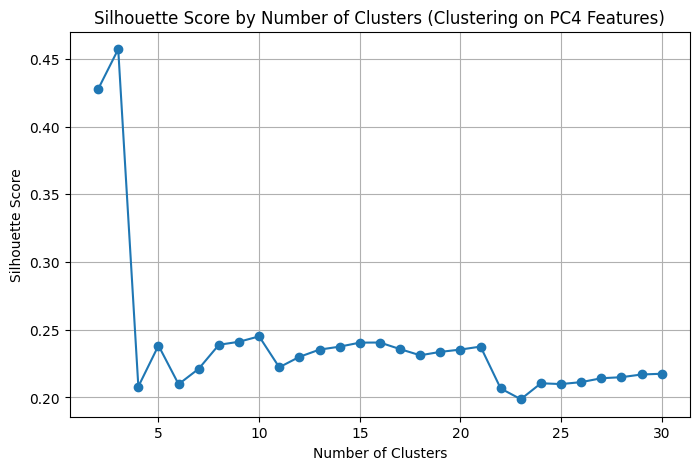

Number of observations in each cluster (full data):
3    3367
1     349
2     114
Name: count, dtype: int64


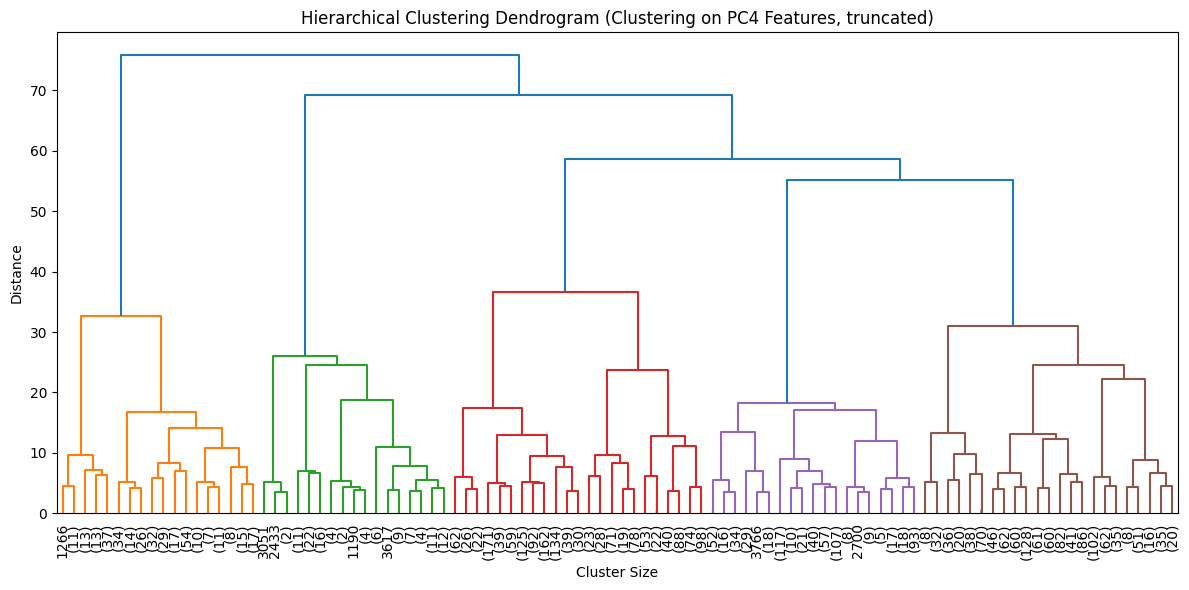

In [20]:
# --- STEP 1: Select PC4 PCA components for clustering ---
pc4_cols = [f'PC4_{i}' for i in range(1, 5)]
X_pc4 = employee_commuting_pca[pc4_cols].dropna()
clust_indices = X_pc4.index

# --- STEP 2: Standardize the PC4 data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pc4)

# --- STEP 3: Hierarchical clustering (Ward linkage) ---
Z = linkage(X_scaled, method='ward')

# --- STEP 4: Find optimal number of clusters using silhouette score ---
range_n_clusters = range(2, 31)  # 2 to 30 clusters
sil_scores = []

for n_clusters in range_n_clusters:
    labels = fcluster(Z, n_clusters, criterion='maxclust')
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

optimal_n_clusters = range_n_clusters[np.argmax(sil_scores)]
print(f"Optimal number of clusters (highest silhouette score): {optimal_n_clusters}")

# --- Plot silhouette scores ---
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters, sil_scores, marker='o')
plt.title('Silhouette Score by Number of Clusters (Clustering on PC4 Features)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# --- STEP 5: Assign optimal cluster labels ---
labels_optimal = fcluster(Z, optimal_n_clusters, criterion='maxclust')

# --- STEP 6: Append cluster labels back to main DataFrame (only for valid rows) ---
employee_commuting_pca['Cluster'] = np.nan  # initialize with NaN
employee_commuting_pca.loc[clust_indices, 'Cluster'] = labels_optimal

# --- STEP 7: Merge cluster feature into main train_df and test_df DataFrames ---
# Assumes train_df and test_df have already been created as split DataFrames

train_df = train_df.merge(
    employee_commuting_pca[['Cluster']], left_index=True, right_index=True, how='left'
)
test_df = test_df.merge(
    employee_commuting_pca[['Cluster']], left_index=True, right_index=True, how='left'
)

# --- Print cluster counts (all data with valid clusters) ---
print("Number of observations in each cluster (full data):")
print(pd.Series(labels_optimal).value_counts())

# --- Optionally plot dendrogram (subset for readability) ---
plt.figure(figsize=(12, 6))
sample_size = min(100, len(X_scaled))  # Plot up to 100 samples for clarity
dendrogram(Z, truncate_mode='lastp', p=sample_size, leaf_rotation=90, leaf_font_size=10, show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (Clustering on PC4 Features, truncated)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3760 entries, 0 to 3759
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_name                   3760 non-null   object 
 1   account_id                     3760 non-null   int64  
 2   Year                           3760 non-null   int64  
 3   Countries                      3760 non-null   object 
 4   Primary_activity               3760 non-null   object 
 5   Primary_sector                 3760 non-null   object 
 6   Market_Cap_USD                 3098 non-null   float64
 7   Revenue_USD                    3140 non-null   float64
 8   ebitda_USD                     3140 non-null   float64
 9   grossProfit_USD                3140 non-null   float64
 10  netIncome_USD                  3140 non-null   float64
 11  cashAndCashEquivalents_USD     3140 non-null   float64
 12  shortTermInvestments_USD       3140 non-null   float6

### HLM Modeling — Employee Commuting (PC4 + Cluster)

- Uses the existing `train_df` and `test_df` splits (no need to re-transform or split).
- Filters for required features, target, and categorical columns.
- Ensures all categorical levels in test are present in train (including Cluster).
- Fits a mixed-effects model using PC4 features and Cluster as fixed effects.
- Evaluates predictions and metrics on the test set.
- Visualizes prediction and actual value distributions.
- Returns a metrics summary for downstream analysis.

_Result:_  
Efficient HLM modeling using PC4 components and Cluster feature, leveraging pre-processed train/test splits.

                                         Mixed Linear Model Regression Results
Model:                            MixedLM               Dependent Variable:               slog_Scope_3_emissions_amount
No. Observations:                 3092                  Method:                           ML                           
No. Groups:                       741                   Scale:                            0.5067                       
Min. group size:                  1                     Log-Likelihood:                   -4215.6169                   
Max. group size:                  5                     Converged:                        Yes                          
Mean group size:                  4.2                                                                                  
-----------------------------------------------------------------------------------------------------------------------
                                                                           Coef. 

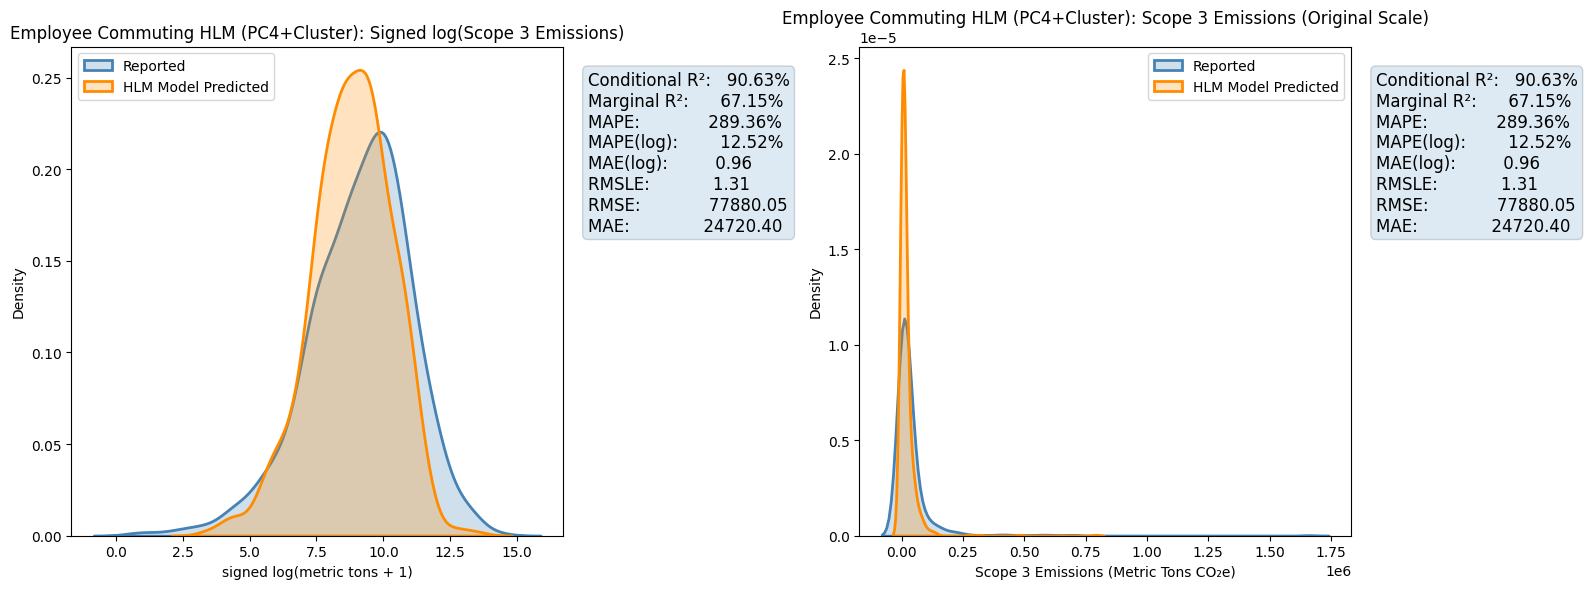

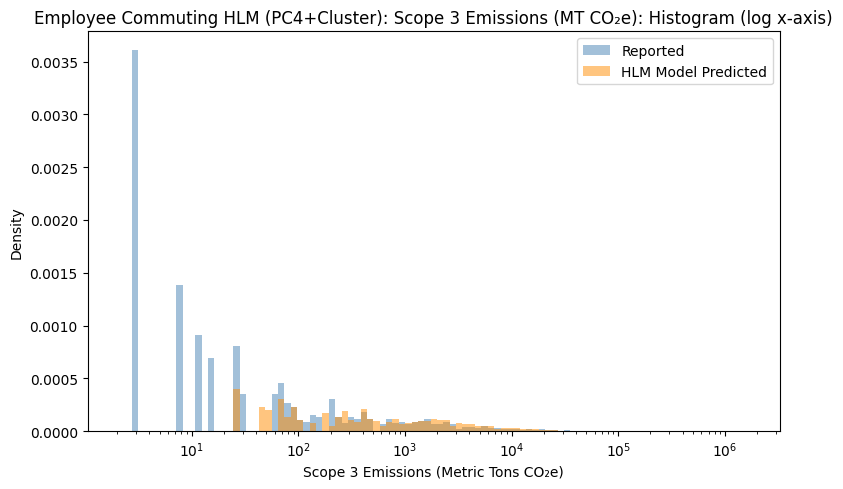

In [22]:
# --- PC4 + Cluster HLM using pre-made train_df and test_df ---

feature_cols_pc4_cluster = [f'PC4_{i}' for i in range(1, 5)] + ['Cluster']
target_col = 'slog_Scope_3_emissions_amount'
cat_cols = ['Countries', 'Year', 'account_id', 'Primary_activity']

all_model_vars = feature_cols_pc4_cluster + [target_col] + cat_cols

# --- 1. Ensure 'Cluster' exists in train/test (should already be present if assigned during clustering)
if 'cluster' in train_df.columns and 'Cluster' not in train_df.columns:
    train_df['Cluster'] = train_df['cluster']
if 'cluster' in test_df.columns and 'Cluster' not in test_df.columns:
    test_df['Cluster'] = test_df['cluster']

# --- 2. Drop any remaining missing values (should be minimal) ---
train_df_pc4c = train_df.dropna(subset=all_model_vars).copy()
test_df_pc4c  = test_df.dropna(subset=all_model_vars).copy()

# --- 3. Ensure all categorical levels in test are present in train ---
for cat_col in ['Countries', 'Primary_activity', 'Cluster']:
    train_cats = set(train_df_pc4c[cat_col].unique())
    n_before = len(test_df_pc4c)
    test_df_pc4c = test_df_pc4c[test_df_pc4c[cat_col].isin(train_cats)]
    n_after = len(test_df_pc4c)
    if n_after < n_before:
        print(f"Warning: Dropped {n_before - n_after} test rows with unseen {cat_col} categories.")

if test_df_pc4c.empty:
    print("WARNING: The filtered test set is empty. No predictions or metrics can be computed.")
else:
    # --- 4. Model formula ---
    fixed_effects = (
        ' + '.join([f'C({col})' if col == 'Cluster' else col for col in feature_cols_pc4_cluster]) +
        ' + C(Countries) + C(Primary_activity) + Year'
    )
    formula = f'{target_col} ~ {fixed_effects}'

    # --- 5. Fit the mixed-effects model ---
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        md = smf.mixedlm(formula, data=train_df_pc4c, groups=train_df_pc4c['account_id'])
        mdf_pc4c = md.fit(reml=False)
    print(mdf_pc4c.summary())

    # --- 6. CALCULATE CONDITIONAL AND MARGINAL R² ---
    var_fixed = np.var(mdf_pc4c.fittedvalues)
    var_resid = mdf_pc4c.scale
    var_random = mdf_pc4c.cov_re.iloc[0, 0] if mdf_pc4c.cov_re.shape[0] > 0 else 0.0
    var_random_total = var_random

    r2_marginal = var_fixed / (var_fixed + var_random_total + var_resid)
    r2_conditional = (var_fixed + var_random_total) / (var_fixed + var_random_total + var_resid)

    print(f"Marginal R² (fixed only):      {r2_marginal:.4f}")
    print(f"Conditional R² (fixed+random): {r2_conditional:.4f}")

    # --- 7. Predict on test set ---
    test_df_pc4c['predicted_log'] = mdf_pc4c.predict(test_df_pc4c)
    test_df_pc4c['predicted'] = np.sign(test_df_pc4c['predicted_log']) * (np.expm1(np.abs(test_df_pc4c['predicted_log'])))

    # --- 8. Metrics ---
    y_true_log = test_df_pc4c[target_col]
    y_pred_log = test_df_pc4c['predicted_log']
    y_true = np.sign(y_true_log) * (np.expm1(np.abs(y_true_log)))
    y_pred = test_df_pc4c['predicted']

    mask = (
        np.isfinite(y_true_log) & np.isfinite(y_pred_log) &
        np.isfinite(y_true) & np.isfinite(y_pred)
    )
    y_true_log = y_true_log[mask]
    y_pred_log = y_pred_log[mask]
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    r2_log_pct = r2_score(y_true_log, y_pred_log) * 100
    r2_pct = r2_score(y_true, y_pred) * 100
    mape_log = np.mean(np.abs((y_true_log - y_pred_log) / np.clip(y_true_log, 1e-8, None))) * 100
    mape_orig = np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-8, None))) * 100
    rmsle = np.sqrt(mean_squared_log_error(np.abs(y_true) + 1, np.abs(y_pred) + 1))
    rmse_orig = np.sqrt(mean_squared_error(y_true, y_pred))
    mae_orig = mean_absolute_error(y_true, y_pred)
    mae_log = mean_absolute_error(y_true_log, y_pred_log)

    metrics_text = (
        f"Conditional R²:   {r2_conditional*100:.2f}%\n"
        f"Marginal R²:      {r2_marginal*100:.2f}%\n"
        f"MAPE:             {mape_orig:.2f}%\n"
        f"MAPE(log):        {mape_log:.2f}%\n"
        f"MAE(log):         {mae_log:.2f}\n"
        f"RMSLE:            {rmsle:.2f}\n"
        f"RMSE:             {rmse_orig:.2f}\n"
        f"MAE:              {mae_orig:.2f}"
    )

    print("\nEmployee Commuting HLM with PC4+Cluster Fixed Effects: Test Set Performance Metrics:")
    print(metrics_text)

    # --- 9. Feature coefficients ---
    coef_df = pd.DataFrame({
        'coef': mdf_pc4c.params,
        'pvalue': mdf_pc4c.pvalues
    }).drop(index="Intercept", errors='ignore').sort_values(by="pvalue")
    print("\nTop Influential Features (by p-value):")
    print(coef_df.head(10))
    print("\nAll feature coefficients sorted by absolute value:")
    print(coef_df.reindex(coef_df['coef'].abs().sort_values(ascending=False).index))

    # --- 10. Visualization ---
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    if y_pred_log.nunique() > 1:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        sns.kdeplot(y_pred_log, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[0], color='darkorange')
    else:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        axes[0].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[0].set_title("Employee Commuting HLM (PC4+Cluster): Signed log(Scope 3 Emissions)")
    axes[0].set_xlabel("signed log(metric tons + 1)")
    axes[0].set_ylabel("Density")
    axes[0].legend()
    axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    if y_pred.nunique() > 1:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        sns.kdeplot(y_pred, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[1], color='darkorange')
    else:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        axes[1].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[1].set_title("Employee Commuting HLM (PC4+Cluster): Scope 3 Emissions (Original Scale)")
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    axes[1].set_ylabel("Density")
    axes[1].legend()
    axes[1].text(1.05, 0.95, metrics_text, transform=axes[1].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    plt.tight_layout()
    plt.show()
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)
    plt.figure(figsize=(8, 5))
    sns.histplot(y_true, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported")
    sns.histplot(y_pred, bins=log_bins, stat="density", color="darkorange", alpha=0.5, label="HLM Model Predicted")
    plt.xscale("log")
    plt.title("Employee Commuting HLM (PC4+Cluster): Scope 3 Emissions (MT CO₂e): Histogram (log x-axis)")
    plt.xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- 12. RETURN METRICS FOR SUMMARY TABLE ---
    pc4_cluster_model_metrics = {
        "Model": "HLM PC4+Cluster",
        "Conditional_R2": r2_conditional,
        "Marginal_R2": r2_marginal,
        "RMSE": rmse_orig,
        "MAE": mae_orig,
        "MAE_log": mae_log,
        "RMSLE": rmsle,
        "MAPE": mape_orig,
        "# Obs (train)": len(train_df_pc4c),
        "# Obs (test)": len(test_df_pc4c),
        "# Obs (train/test)": f"{len(train_df_pc4c)}/{len(test_df_pc4c)}"
    }

### Model Metrics Summary — Employee Commuting HLM Models

In [33]:
# Collect metrics dicts from each model; update names as needed
metrics_dicts = [
    PC9_model_metrics,        # "HLM PC9"
    pc4_model_metrics,        # "HLM PC4"
    pc4_cluster_model_metrics # "HLM PC4 + Cluster"
]

# Attach observation counts, convergence status, and explained variance to each dictionary
for metrics, train, test, fit_result, explained_var in zip(
        metrics_dicts,
        [train_df_PC9, train_df_pc4, train_df_pc4c],   # <- Use correct train dfs for each model
        [test_df_PC9, test_df_pc4, test_df_pc4c],      # <- Use correct test dfs for each model
        [mdf_PC9, mdf_pc4, mdf_pc4c],
        [
            sum(pca9.explained_variance_ratio_),
            sum(pca4.explained_variance_ratio_),
            sum(pca4.explained_variance_ratio_)
        ]):
    metrics["# Obs (train)"] = len(train)
    metrics["# Obs (test)"] = len(test)
    metrics["# Obs (train/test)"] = f"{len(train)}/{len(test)}"
    metrics["Converged"] = "Yes" if getattr(fit_result, "converged", False) else "No"
    metrics["PC Explained Variance"] = explained_var

# Add a new row for your "Optimized" model
optimized_row = {
    "Model": "Optimized Employee Commuting HLM",
    "Conditional_R2": 0.9027,
    "Marginal_R2": 0.6830,
    "RMSE": 65426.33,
    "MAE": 22518.98,
    "MAE_log": 0.84,
    "RMSLE": 1.15,
    "MAPE": 243.28,
    "# Obs (train/test)": "3092/653",
    "PC Explained Variance": "",
    "Converged": "Yes"
}
metrics_dicts.append(optimized_row)

metrics_df = pd.DataFrame(metrics_dicts)

# Order columns for summary (Converged LAST)
desired_order = [
    "Model", "PC Explained Variance", "Conditional_R2", "Marginal_R2", "RMSE", "MAE", "MAE_log", "RMSLE", "MAPE", "# Obs (train/test)", "Converged"
]

# Add MAE_log if missing
if "MAE_log" not in metrics_df.columns:
    metrics_df["MAE_log"] = ""

for col in desired_order:
    if col not in metrics_df.columns:
        metrics_df[col] = ""

metrics_df = metrics_df[[col for col in desired_order if col in metrics_df.columns]]

# Format for display
metrics_df_display = metrics_df.copy()
if "Conditional_R2" in metrics_df_display.columns:
    metrics_df_display["Conditional_R2"] = metrics_df_display["Conditional_R2"].apply(
        lambda x: "" if x == "" else "{:.2f}%".format(float(x) * 100)
    )
if "Marginal_R2" in metrics_df_display.columns:
    metrics_df_display["Marginal_R2"] = metrics_df_display["Marginal_R2"].apply(
        lambda x: "" if x == "" else "{:.2f}%".format(float(x) * 100)
    )
for col in ["RMSE", "MAE", "MAE_log", "RMSLE", "MAPE", "PC Explained Variance"]:
    if col in metrics_df_display.columns:
        if col == "PC Explained Variance":
            metrics_df_display[col] = metrics_df_display[col].apply(
                lambda v: "{:.2%}".format(v) if v != "" and pd.notnull(v) else ""
            )
        else:
            metrics_df_display[col] = metrics_df_display[col].apply(
                lambda v: "" if v == "" else "{:.2f}".format(float(v)) if pd.notnull(v) else ""
            )

# Display in notebook or print
try:
    display(metrics_df_display)
except Exception:
    print(metrics_df_display.to_string(index=False))

,Model,PC Explained Variance,Conditional_R2,Marginal_R2,RMSE,MAE,MAE_log,RMSLE,MAPE,# Obs (train/test),Converged
0,HLM PC9,90.00%,90.56%,68.23%,75402.39,24182.78,0.89,1.20,208.64,3092/653,Yes
1,HLM PC4,62.98%,90.59%,67.08%,78314.35,24856.29,0.91,1.21,195.09,3092/653,Yes
2,HLM PC4+Cluster,62.98%,90.63%,67.15%,77880.05,24720.40,0.96,1.31,289.36,3092/690,Yes
3,Optimized Employee Commuting HLM,,90.27%,68.30%,65426.33,22518.98,0.84,1.15,243.28,3092/653,Yes
